In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

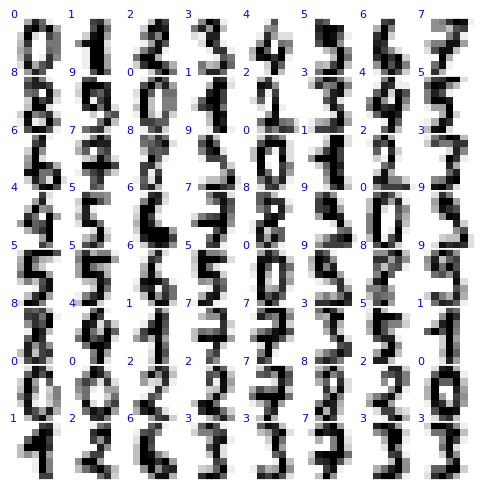

In [4]:
fig,ax = plt.subplots(8,8, figsize=(6,6),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0, wspace=0))
for i,axi in enumerate(ax.flat):
  axi.imshow(digits.images[i], cmap='binary')
  axi.text(0,1, str(digits.target[i]), fontsize=8,
           color='blue', transform=axi.transAxes)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
digits_trf = pca.fit_transform(digits.data)

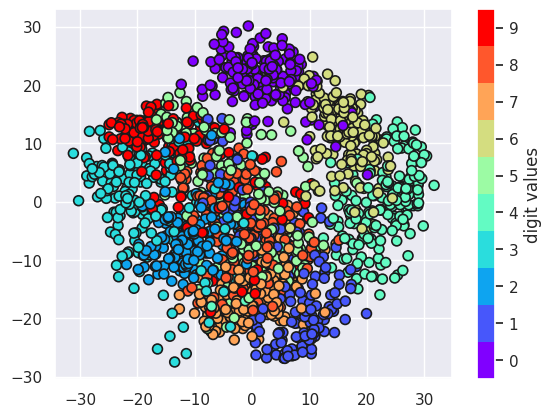

In [7]:
plt.scatter(digits_trf[:,0], digits_trf[:,1], c=digits.target, s=50, ec='k', lw=1.2,
            cmap=mpl.colormaps['rainbow'].resampled(10))
plt.colorbar(ticks=np.arange(10), label='digit values')
plt.clim(-0.5, 9.5)

Text(0, 0.5, 'cumulative variance ratio')

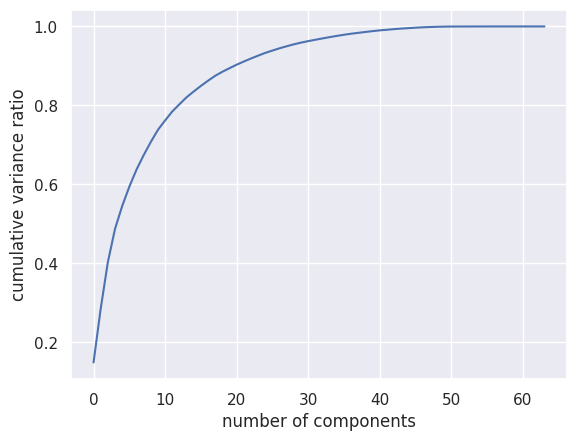

In [8]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance ratio')

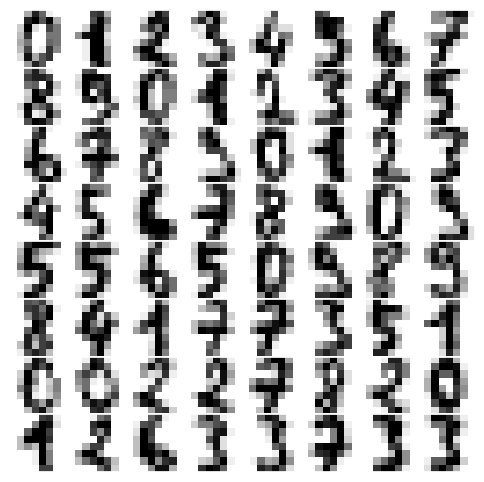

In [15]:
def plot_digits(data):
  fig,ax = plt.subplots(8,8, figsize=(6,6),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0, wspace=0))
  for i,axi in enumerate(ax.flat):
    axi.imshow(data[i].reshape(8,8), cmap='binary')

plot_digits(digits.data)

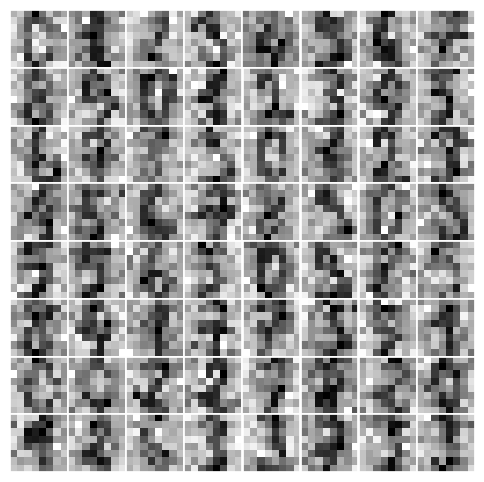

In [11]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.5).fit(noisy)

In [13]:
digits_trf = pca.transform(noisy)
digits_inv = pca.inverse_transform(digits_trf)

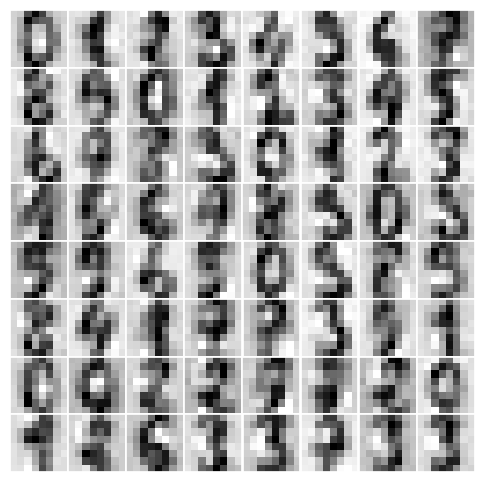

In [14]:
plot_digits(digits_inv)